# Data Description

This exercise predicts the power distribution among the fuel columns based on the control rod configuration.
A word of caution.
This is an approximation.
Control rods control reactivity and flux shape, but not the flux level.
So, for the same control rod configuration, the power distribution should be the same, but not necessarily the power of each column.


#### Input:

* CRX: axial position in cm of control rod X - min: 20 cm, max: 28 cm

#### Output:

* Power generated in fuel columns (A-1, A-3, B-3, B-6, B-9 are empty)

## EDA

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
xdata = pd.read_csv('crx.csv')
xdata.head()

,CR1,CR2,CR3,CR4,CR5,CR6
0,25.959917,22.949372,20.853175,24.669168,20.481047,25.357266
1,21.753868,25.360626,20.588530,20.110872,27.467110,25.816585
2,27.429199,23.570180,27.596307,26.390445,23.996037,24.611822
3,21.788159,24.289480,25.195061,23.462239,25.314196,21.665092
4,20.651764,26.309493,24.645944,25.897686,23.748592,26.946972


In [3]:
xdata.shape

(1000, 6)

(7.894900242752556, 0.0)

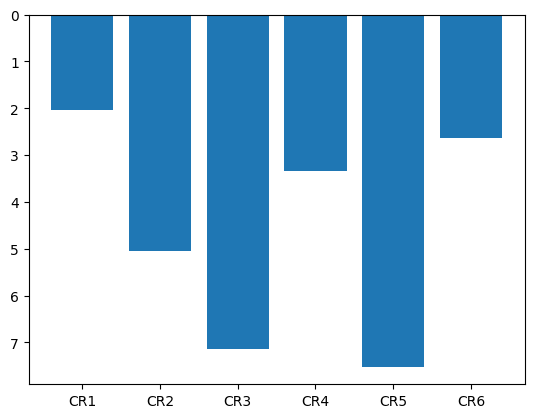

In [10]:
x = xdata.columns
height = xdata.loc[0]  # case 0

plt.bar(x, 28-height)
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
plt.ylabel('Insertion Depth [cm]')  # 0 is top
plt.xlabel('Control Rod Label')

In [4]:
ydata = pd.read_csv('powery.csv')
ydata.head()

,A-2,B-1,B-2,B-4,B-5,B-7,B-8,C-1,C-2,C-3,...,C-6,C-7,C-8,C-9,C-10,C-11,C-12,C-13,C-14,C-15
0,25930.916138,22958.314941,21725.516357,22799.333618,21815.979675,22785.586487,21279.806152,18421.966827,18484.818298,18886.733154,...,18784.499451,18171.291687,18604.801849,18593.999756,19458.648743,18113.577637,17390.992249,17912.014526,18207.042603,19089.969421
1,25883.078125,22856.061951,21602.108765,22721.063293,21698.868164,22916.184875,21447.282837,17945.424408,17894.501221,18588.017639,...,18727.330261,18035.394409,18114.253510,18005.816956,19148.114197,18807.224915,18331.525757,18699.555573,18381.290527,19052.587830
2,25672.208252,22584.910950,21419.950256,22721.304749,21802.134827,22572.159546,20975.878662,18184.984711,18316.332275,18761.267548,...,19440.091980,18987.642334,19354.132843,18791.702271,19605.605347,18351.250732,17572.990784,17878.914185,17831.210449,18702.889954
3,25897.859375,22661.180420,21529.638977,22943.255249,21972.662415,22834.193054,21179.314453,17646.767395,17705.476135,18429.696381,...,19395.144714,18863.283508,19052.659454,18591.373230,19532.076660,18663.584961,17934.262787,17923.863403,17608.497009,18401.561340
4,25761.079712,22576.364319,21405.163879,22783.927185,21851.152466,22721.955627,21140.955383,17564.821411,17507.742371,18373.703308,...,19245.952881,18686.140686,19088.561737,18763.566223,19647.963135,18462.088745,17718.471191,18201.529053,18189.525635,18834.598328


In [5]:
ydata.shape

(1000, 22)

In [19]:
import numpy as np 
import cv2


def plot_mitr(Ynn):
    plt.figure(figsize=(20,14))
    pos=[(400,330), (465,230), (500,300), (395,400), (320,400), (285,255), (318,193),
         (500,165), (535,230), (575,295), (535,360), (500, 430), (430, 465), (355, 465), (280, 465),
         (240,400), (205, 335), (210,255), (243,193), (280,130), (355,130), (430,130),
         (393,193), (460,360), (280, 335), (400,265), (340,295)]   

    image = cv2.imread('mitr_temp.png')
    for i in range(len(pos)):
        if i==0:
            image=cv2.putText(img=np.copy(image), text=str(int(Ynn[i])), org=pos[i], fontFace=1, fontScale=1.1, color=(0,0,0))
        if i in [1,2,3,4,5,6]:
            image=cv2.putText(img=np.copy(image), text=str(int(Ynn[i])), org=pos[i], fontFace=1, fontScale=1.1, color=(0,0,255)) 
        if i in list(range(7,22)):
            image=cv2.putText(img=np.copy(image), text=str(int(Ynn[i])), org=pos[i], fontFace=1, fontScale=1.1, color=(0, 100, 0)) 
        if i in list(range(22,28)):
            image=cv2.putText(img=np.copy(image), text=str('Empty'), org=pos[i], fontFace=1, fontScale=1.1, color=(233, 150, 122))            
    # cv2.imwrite("mitr.jpg", image, [int(cv2.IMWRITE_JPEG_QUALITY), 300])
    plt.imshow(image)


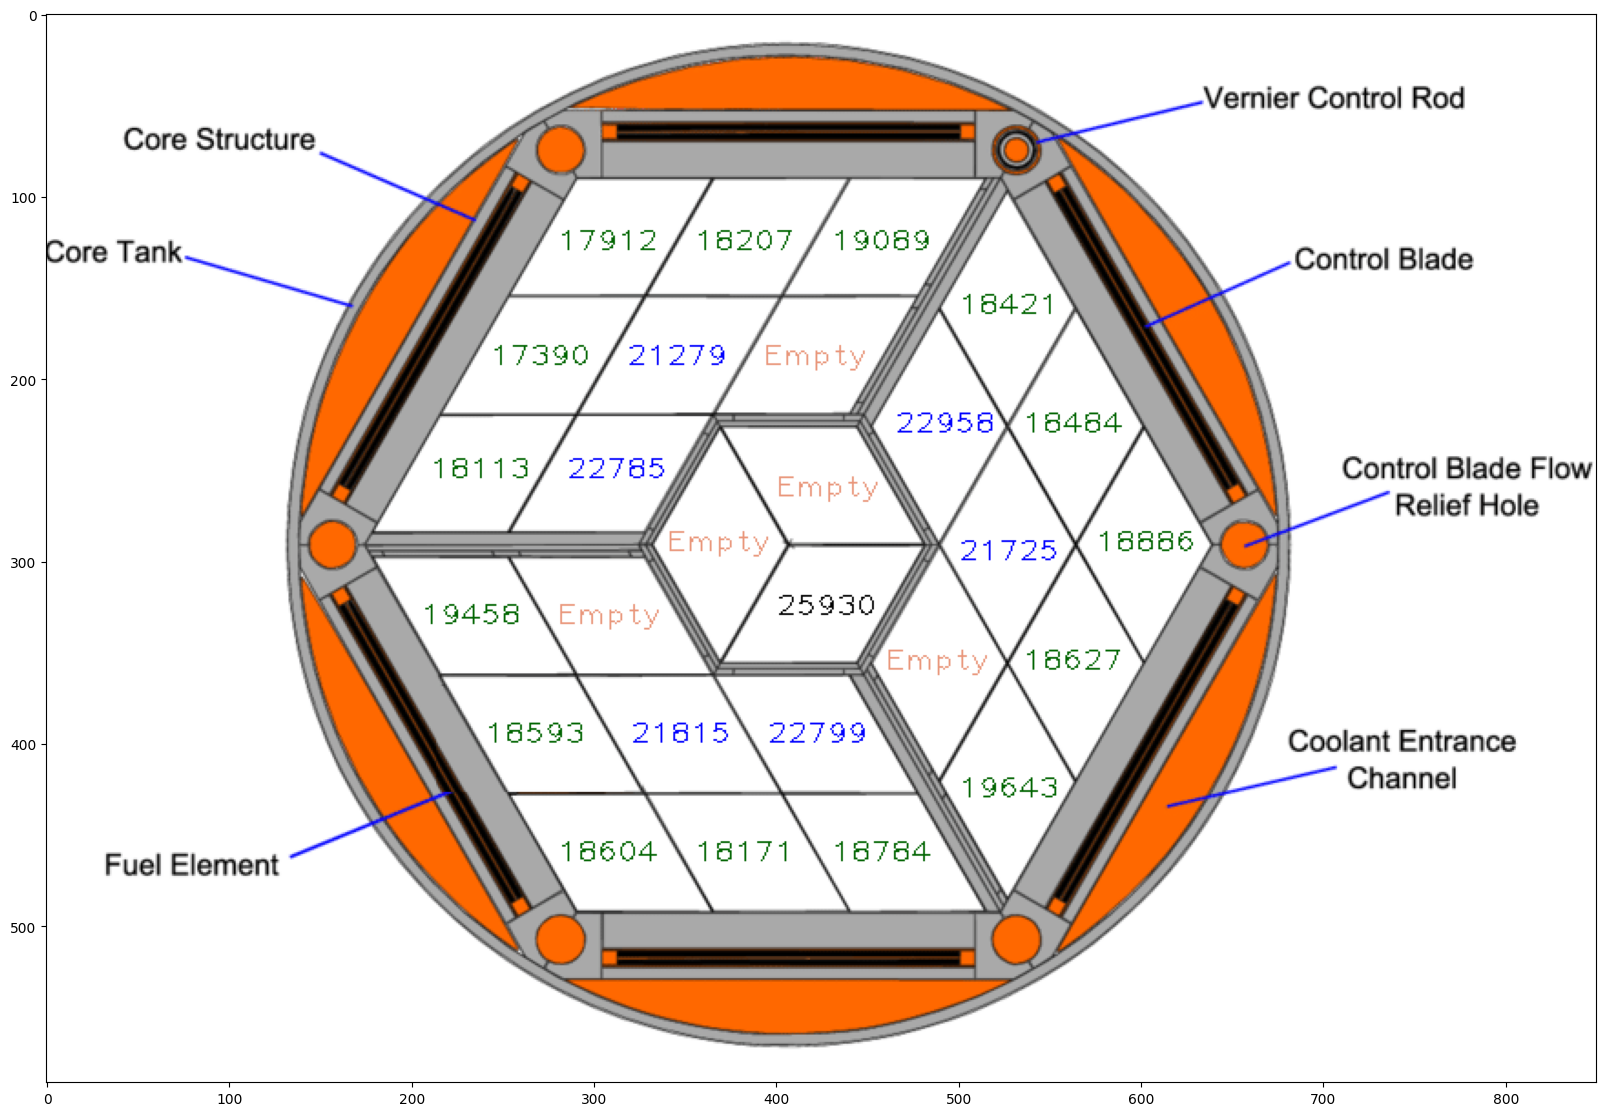

In [21]:
power = ydata.loc[0]  # case 0
plot_mitr(power)

## Data pre-processing

In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
# here we assume that the data was randomly generated
xtrain = xdata.loc[:899]
xtest = xdata.loc[900:]

ytrain = ydata.loc[:899]
ytest = ydata.loc[900:]

In [26]:
xscaler = MinMaxScaler()
Xtrain = xscaler.fit_transform(xtrain)
Xtest = xscaler.transform(xtest)

yscaler = MinMaxScaler()
Ytrain = yscaler.fit_transform(ytrain)
Ytest = yscaler.transform(ytest)

## FNN

In [89]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau


In [90]:
model = Sequential()
model.add(Dense(100, activation='relu', kernel_initializer = 'normal', input_dim = Xtrain.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu', kernel_initializer = 'normal'))
model.add(Dense(200, activation='relu', kernel_initializer = 'normal'))
model.add(Dense(200, activation='relu', kernel_initializer = 'normal'))
model.add(Dense(200, activation='relu', kernel_initializer = 'normal'))
model.add(Dense(200, activation='relu', kernel_initializer = 'normal'))
model.add(Dense(Ytrain.shape[1], activation='linear', kernel_initializer = 'normal'))

#--Compile the model
model.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=6e-4), metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 100)               700       
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_51 (Dense)            (None, 200)               20200     
                                                                 
 dense_52 (Dense)            (None, 200)               40200     
                                                                 
 dense_53 (Dense)            (None, 200)               40200     
                                                                 
 dense_54 (Dense)            (None, 200)               40200     
                                                                 
 dense_55 (Dense)            (None, 200)              

In [91]:
reduce_lr = ReduceLROnPlateau(monitor='val_mean_absolute_error', factor=0.9, patience=5, min_lr=0., verbose=1)
history = model.fit(Xtrain, Ytrain, callbacks=[reduce_lr], epochs=100, batch_size=8, validation_split=0.15, verbose=False)


Epoch 33: ReduceLROnPlateau reducing learning rate to 0.0005400000256486237.

Epoch 38: ReduceLROnPlateau reducing learning rate to 0.0004860000335611403.

Epoch 44: ReduceLROnPlateau reducing learning rate to 0.00043740003020502626.

Epoch 54: ReduceLROnPlateau reducing learning rate to 0.0003936600376619026.

Epoch 59: ReduceLROnPlateau reducing learning rate to 0.0003542940365150571.

Epoch 66: ReduceLROnPlateau reducing learning rate to 0.0003188646223861724.

Epoch 71: ReduceLROnPlateau reducing learning rate to 0.00028697816014755517.

Epoch 76: ReduceLROnPlateau reducing learning rate to 0.00025828033103607594.

Epoch 81: ReduceLROnPlateau reducing learning rate to 0.00023245230840984732.

Epoch 86: ReduceLROnPlateau reducing learning rate to 0.0002092070775688626.

Epoch 93: ReduceLROnPlateau reducing learning rate to 0.0001882863711216487.

Epoch 98: ReduceLROnPlateau reducing learning rate to 0.0001694577353191562.


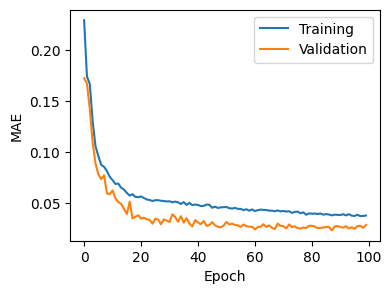

In [92]:
y1 = history.history['mean_absolute_error']
y2 = history.history['val_mean_absolute_error']

plt.figure(figsize=(4, 3))
plt.plot(np.arange(0, 100), y1, label='Training')
plt.plot(np.arange(0, 100), y2, label='Validation')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

In [93]:
Ynn = model.predict(Xtest)
ynn = yscaler.inverse_transform(Ynn)

print(mean_absolute_error(ytest, ynn))
print(np.sqrt(mean_squared_error(ytest, ynn)))
print(r2_score(ytest, ynn))

4/4 [==============================] - 0s 2ms/step
39.44280838012701
52.5666225591225
0.9669933241700299


1/1 [==============================] - 0s 23ms/step


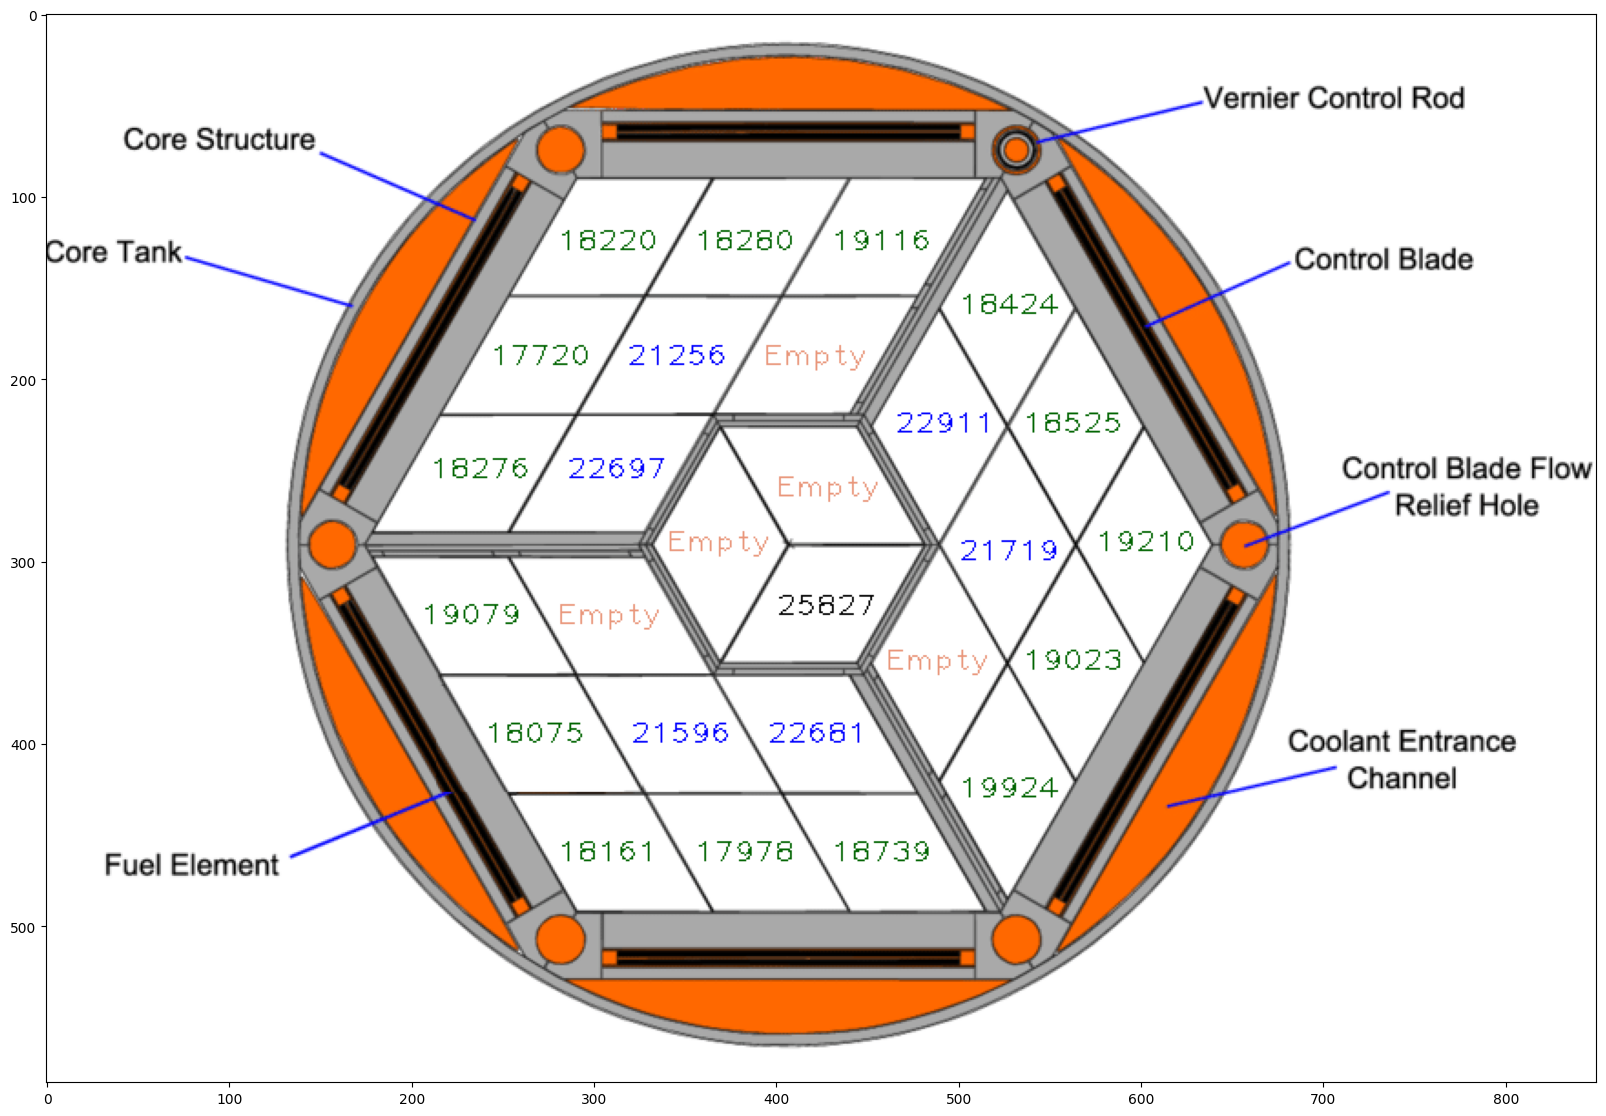

In [94]:
# use the model to predict a power distribution
x = np.array([0.75266553, 0.90280633, 0.00539489, 0.25308624, 0.57678792, 0.77792903])
Y = model.predict(x.reshape(1, -1))
y = yscaler.inverse_transform(Y)
plot_mitr(y.reshape(-1,))